In [31]:
import statistics
import numpy as np
import pandas as pd
import copy
import seaborn as sns
import scipy.stats as stats
from scipy.stats import pearsonr
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from thinkstats2 import Pmf
import warnings
warnings.filterwarnings("ignore")
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_predict
import statsmodels.api as sm
from sklearn.metrics import r2_score

In [2]:
df_Insurance = pd.read_csv("../code/insurance.csv")
df_Insurance.head(5)
df_Insurance.shape
df_Insurance.info()
df_Insurance.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


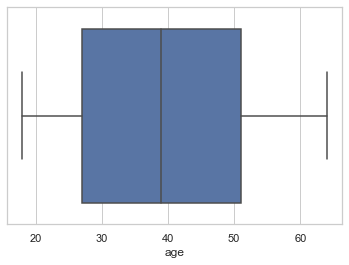

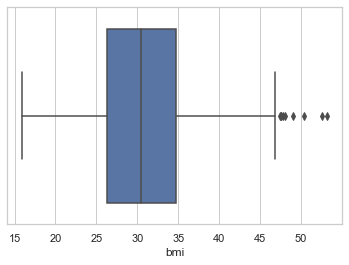

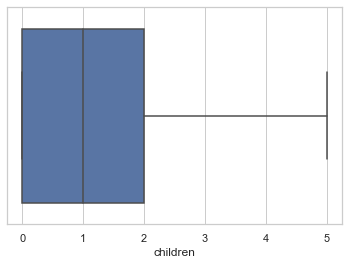

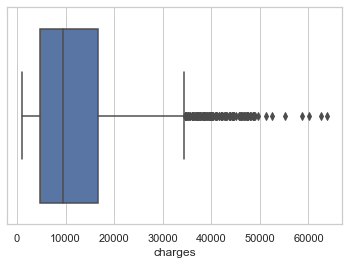

In [3]:
sns.set(style="whitegrid")
sns.boxplot(df_Insurance["age"])
plt.show()
sns.boxplot(df_Insurance["bmi"])
plt.show()
sns.boxplot(df_Insurance["children"])
plt.show()
sns.boxplot(df_Insurance["charges"])
plt.show()


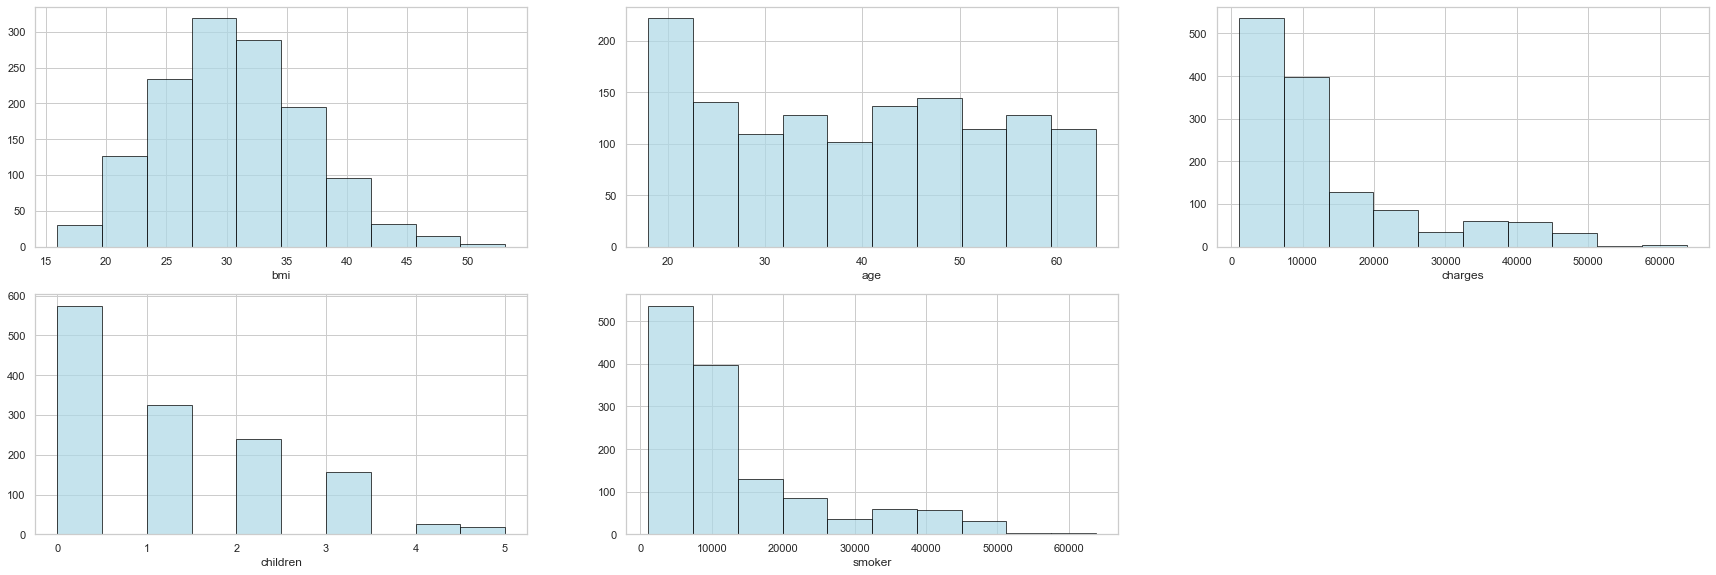

In [4]:
#Histogram
df_Insurance.boxplot(figsize=(30, 15))
plt.subplot(3, 3, 1)
plt.hist(df_Insurance.bmi, color='lightblue', edgecolor='black', alpha=0.7)
plt.xlabel('bmi')
plt.subplot(3, 3, 2)
plt.hist(df_Insurance.age, color='lightblue', edgecolor='black', alpha=0.7)
plt.xlabel('age')
plt.subplot(3, 3, 3)
plt.hist(df_Insurance.charges, color='lightblue', edgecolor='black', alpha=0.7)
plt.xlabel('charges')
plt.subplot(3, 3, 4)
plt.hist(df_Insurance.children, color='lightblue', edgecolor='black', alpha=0.7)
plt.xlabel('children')
plt.subplot(3, 3, 5)
plt.hist(df_Insurance.charges, color='lightblue', edgecolor='black', alpha=0.7)
plt.xlabel('smoker')
plt.show()

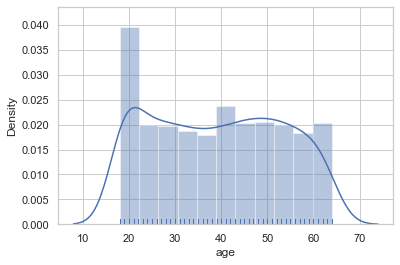

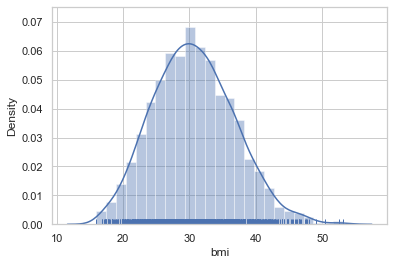

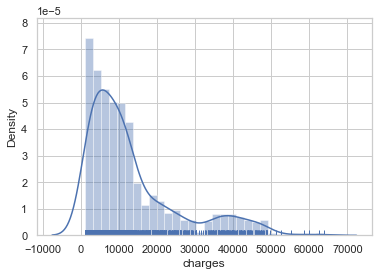

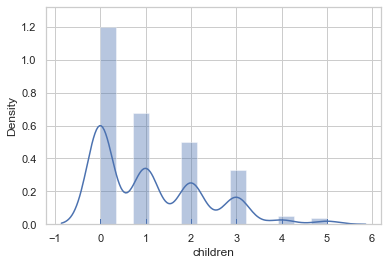

In [5]:
#Skewness
sns.distplot(df_Insurance['age'], kde=True, rug=True)
plt.show()
sns.distplot(df_Insurance['bmi'], kde=True, rug=True)
plt.show()
sns.distplot(df_Insurance['charges'], kde=True, rug=True)
plt.show()
sns.distplot(df_Insurance['children'], kde=True, rug=True)
plt.show()
Skewness = pd.DataFrame({'Skewness': [stats.skew(df_Insurance.bmi),
                                      stats.skew(df_Insurance.age), stats.skew(df_Insurance.charges)]},
                        index=['bmi', 'age', 'charges'])


In [6]:
# Finding outliers through python code
iqr = np.subtract(*np.percentile(df_Insurance['charges'], [75, 25]))
print(iqr)

# identify outliers for charges
q25, q75 = np.percentile(df_Insurance['charges'], 25), np.percentile(df_Insurance['charges'], 75)
iqr = q75 - q25
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off

outliers = [x for x in df_Insurance['charges'] if x < lower or x > upper]
print('Identified outliers for charges out of 1138: %d' % len(outliers))

# identify outliers for bmi
q25, q75 = np.percentile(df_Insurance['bmi'], 25), np.percentile(df_Insurance['bmi'], 75)
iqr = q75 - q25
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off

outliers = [x for x in df_Insurance['bmi'] if x < lower or x > upper]
print('Identified outliers for bmi out of 1338 records: %d' % len(outliers))

# identify outliers for age
q25, q75 = np.percentile(df_Insurance['age'], 25), np.percentile(df_Insurance['age'], 75)
iqr = q75 - q25
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off

outliers = [x for x in df_Insurance['age'] if x < lower or x > upper]
print('Identified outliers for age out of 1338 records: %d' % len(outliers))


11899.625365
Identified outliers for charges out of 1138: 139
Identified outliers for bmi out of 1338 records: 9
Identified outliers for age out of 1338 records: 0


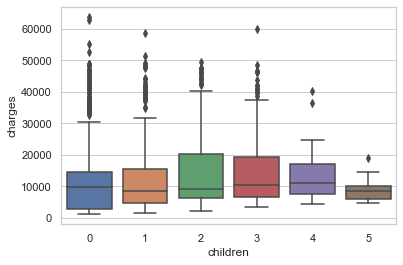

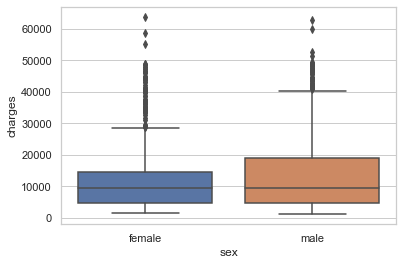

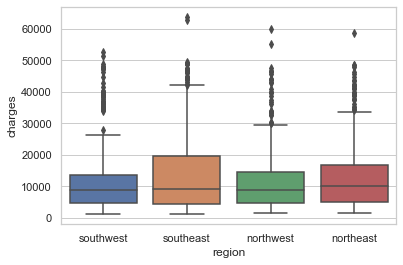

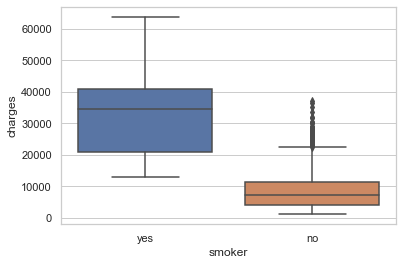

In [7]:
# Categorical distribution plots
sns.boxplot(x='children', y='charges', data=df_Insurance)
plt.show()
sns.boxplot(x='sex', y='charges', data=df_Insurance)
plt.show()
sns.boxplot(x='region', y='charges', data=df_Insurance)
plt.show()
sns.boxplot(x='smoker', y='charges', data=df_Insurance)
plt.show()

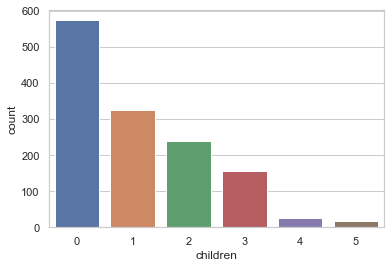

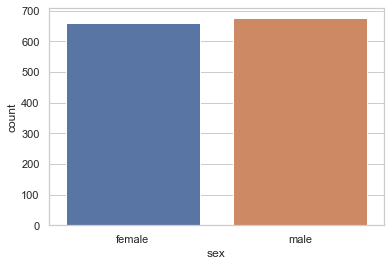

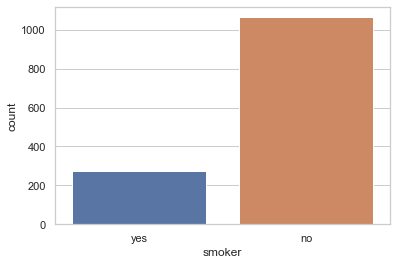

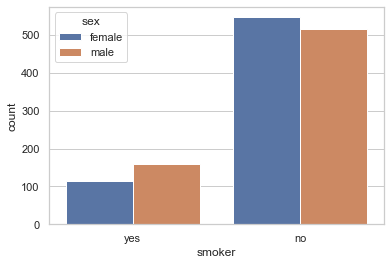

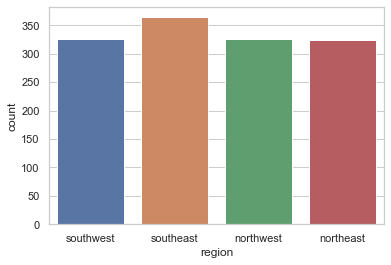

In [8]:
# Categorical estimate plots
sns.countplot(df_Insurance['children'])
plt.show()
sns.countplot(df_Insurance['sex'])
plt.show()
sns.countplot(df_Insurance['smoker'])
plt.show()
sns.countplot(df_Insurance['smoker'], hue=df_Insurance['sex'])
plt.show()
sns.countplot(df_Insurance['region'])
plt.show()


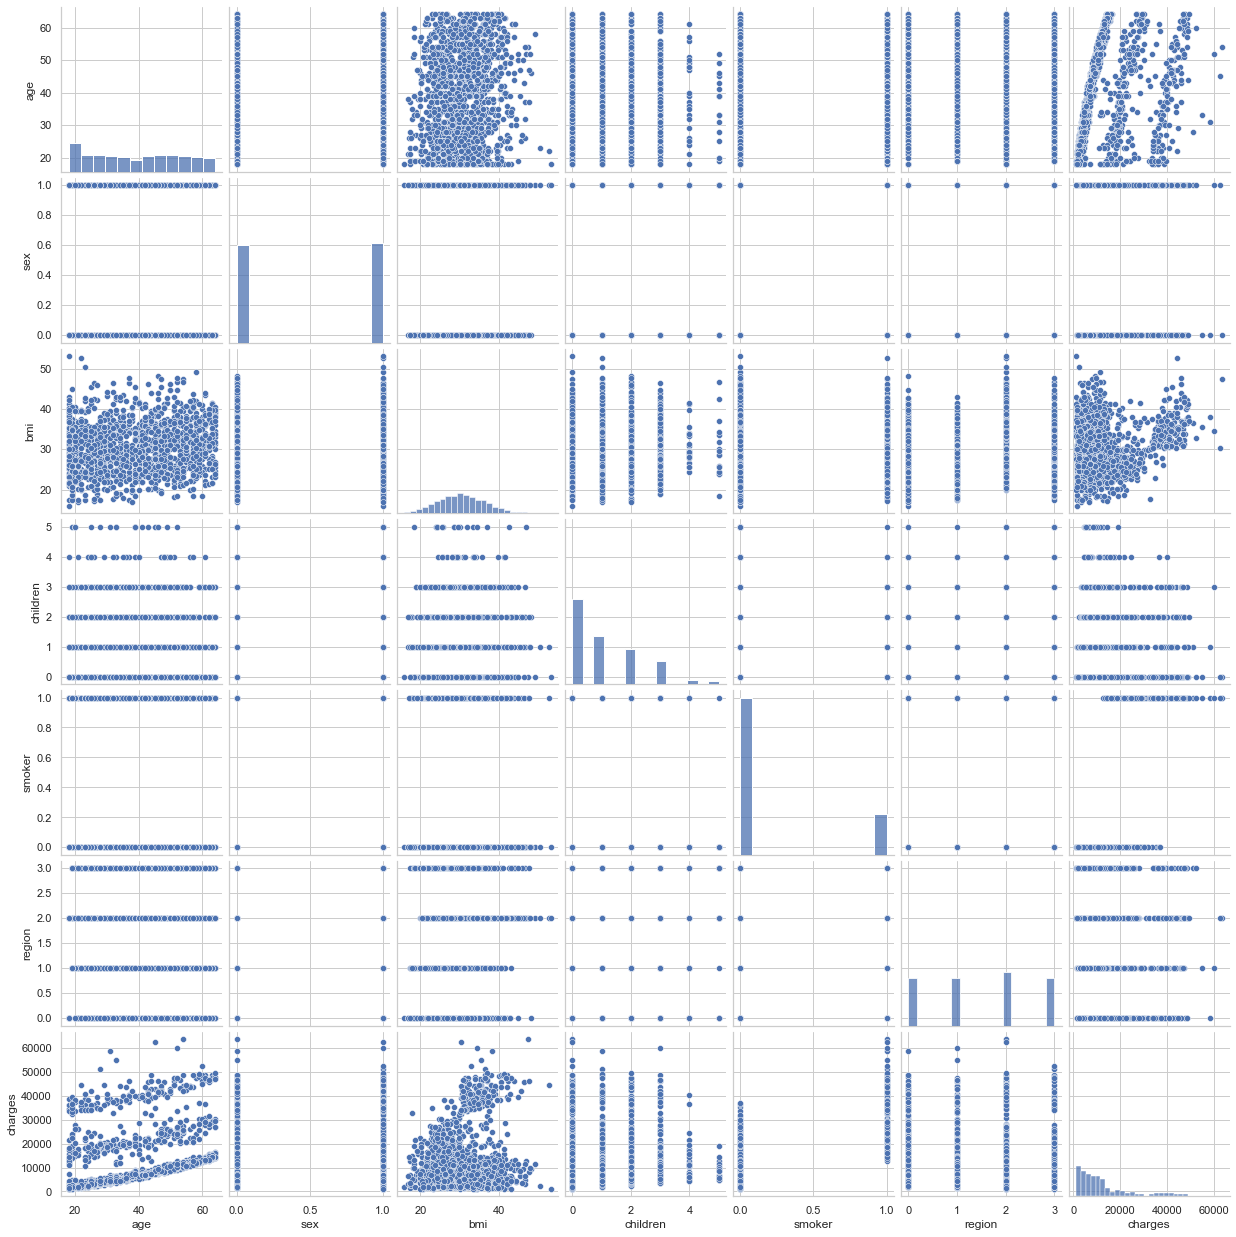

In [9]:
# Pair plot that includes all the columns of the dataframe
# Label encoding the variables before doing a pairplot because pairplot ignores strings
insurance_df_encoded = copy.deepcopy(df_Insurance)
insurance_df_encoded.loc[:, ['sex', 'smoker', 'region']] = df_Insurance.loc[:, ['sex', 'smoker', 'region']].apply(
    LabelEncoder().fit_transform)
sns.pairplot(insurance_df_encoded)  # pairplot
plt.show()

In [10]:
df_Insurance.mean()

age            39.207025
bmi            30.663397
children        1.094918
charges     13270.422265
dtype: float64

In [11]:
age_des = df_Insurance['age'].describe()
age_des['mean']
child_des = df_Insurance['children'].describe()
child_des['mean']
bmi_des = df_Insurance['bmi'].describe()
bmi_des['mean']
charges_des = df_Insurance['charges'].describe()
charges_des['mean']

13270.422265141257

In [12]:
# Mean
age = statistics.mean(age_des)
print('age mean:', age)

bmi = statistics.mean(bmi_des)
print('bmi mean:', bmi)

children = statistics.mean(child_des)
print('children mean:', children)

charges = statistics.mean(charges_des)
print('charges mean:', charges)


age mean: 198.78212322378468
bmi mean: 191.9051979715832
children mean: 168.5375513159406
charges mean: 15296.621009604407


In [13]:
df_Insurance.median()

age           39.000
bmi           30.400
children       1.000
charges     9382.033
dtype: float64

In [14]:
# Median
age = statistics.median(age_des)
print('age median:', age)

bmi = statistics.median(bmi_des)
print('bmi median:', bmi)

children = statistics.median(child_des)
print('children median:', children)

charges = statistics.median(charges_des)
print('charges median:', charges)

age median: 39.10351270553065
bmi median: 30.531698430493268
children median: 1.1502052637624047
charges median: 10746.022118346997


In [15]:
df_Insurance.mode()

,age,sex,bmi,children,smoker,region,charges
0,18,male,32.3,0,no,southeast,1639.5631


In [16]:
# Variance
variance = np.var(df_Insurance)
print(np.sqrt(variance))
print(np.std(df_Insurance))

age            14.044709
bmi             6.095908
children        1.205042
charges     12105.484976
dtype: float64
age            14.044709
bmi             6.095908
children        1.205042
charges     12105.484976
dtype: float64


In [17]:
# PMF
pmf_age = Pmf(age_des)
print(pmf_age)

Pmf({27.0: 0.125, 39.20702541106129: 0.125, 18.0: 0.125, 14.049960379216172: 0.125, 39.0: 0.125, 64.0: 0.125, 1338.0: 0.125, 51.0: 0.125})


meddatalength 0      -168.659240
1       -17.075523
2       -44.214620
3      -219.514706
4       -38.348552
           ...    
1333   -105.505483
1334    -21.879808
1335    -16.118335
1336    -19.869450
1337   -290.803603
Length: 1338, dtype: float64


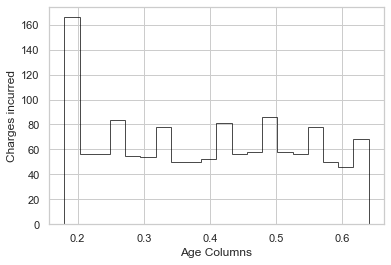

In [18]:
# CDF
agecol = df_Insurance['age'] / 100
chargescol = df_Insurance['charges'] / 100

meddatalength = agecol - chargescol
print("meddatalength", meddatalength)

plt.hist(agecol, bins=20, histtype='step', color='lightblue', edgecolor='black', alpha=0.7)

# Label the axes
plt.xlabel('Age Columns')
plt.ylabel('Charges incurred')

# Show the plot
plt.show()

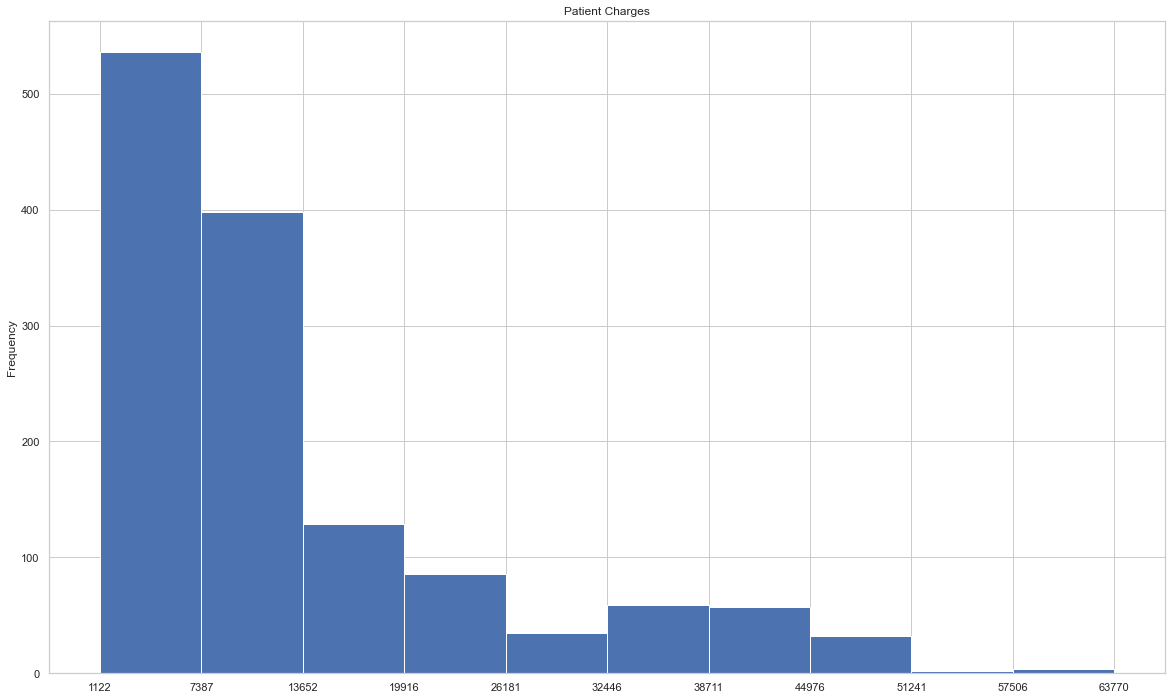

In [19]:
# Correlation
corr = df_Insurance.corr()
df_Insurance.corr()['charges'].sort_values()
count, bin_edges = np.histogram(df_Insurance['charges'])
df_Insurance['charges'].plot(kind='hist', xticks=bin_edges, figsize=(20, 12))
plt.title("Patient Charges")
plt.show()

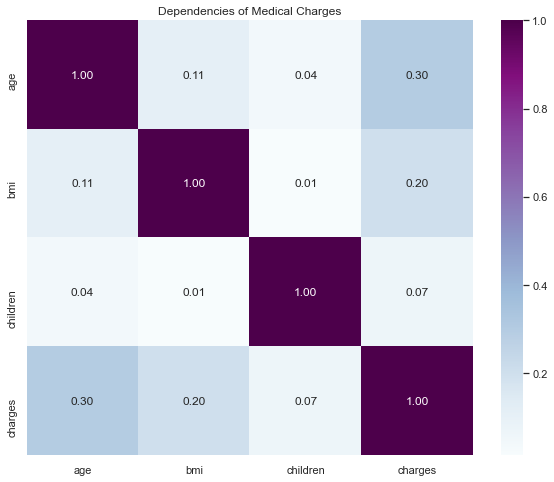

In [20]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, cmap='BuPu', annot=True, fmt=".2f", ax=ax)
plt.title("Dependencies of Medical Charges")
plt.show()

In [21]:
# Sex, Children and Region do not affect the Charges. We might drop these 3 columns as they have less correlation
print(df_Insurance['sex'].value_counts().sort_values())
print(df_Insurance['smoker'].value_counts().sort_values())
print(df_Insurance['region'].value_counts().sort_values())

female    662
male      676
Name: sex, dtype: int64
yes     274
no     1064
Name: smoker, dtype: int64
northeast    324
northwest    325
southwest    325
southeast    364
Name: region, dtype: int64


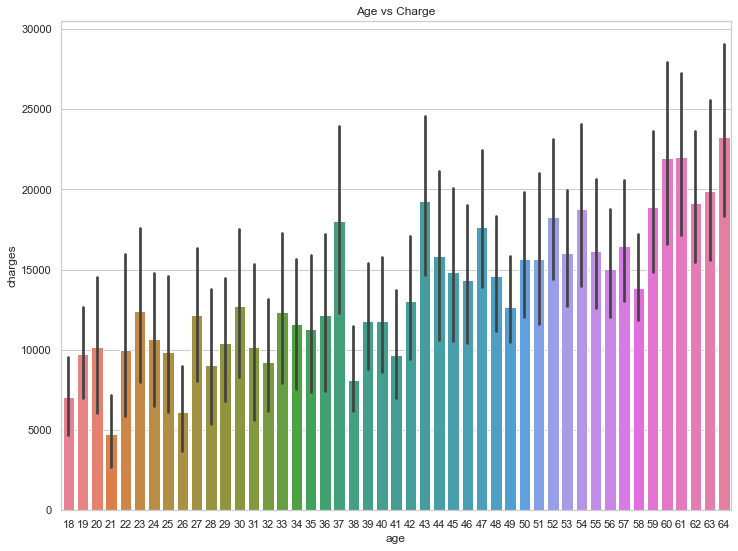

In [22]:
plt.figure(figsize=(12, 9))
plt.title('Age vs Charge')
sns.barplot(x='age', y='charges', data=df_Insurance, palette='husl')
plt.show()

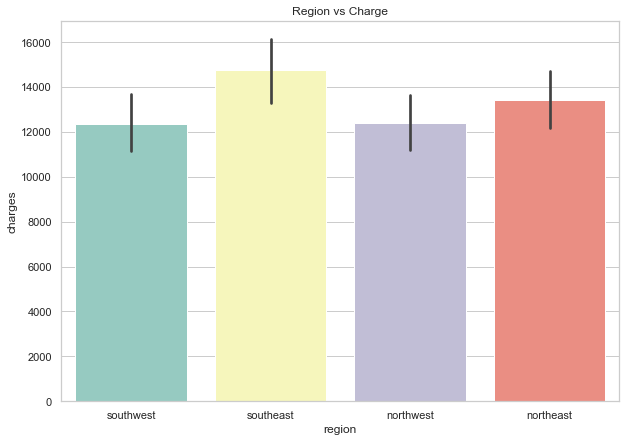

In [23]:
plt.figure(figsize=(10, 7))
plt.title('Region vs Charge')
sns.barplot(x='region', y='charges', data=df_Insurance, palette='Set3')
plt.show()

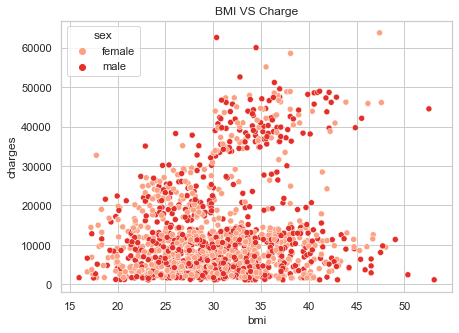

In [24]:
plt.figure(figsize=(7, 5))
plt.title('BMI VS Charge')
sns.scatterplot(x='bmi', y='charges', hue='sex', data=df_Insurance, palette='Reds')
plt.show()

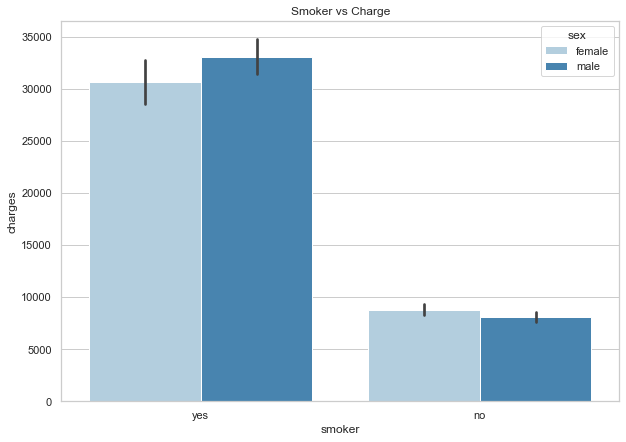

In [25]:
plt.figure(figsize=(10, 7))
plt.title('Smoker vs Charge')
sns.barplot(x='smoker', y='charges', data=df_Insurance, palette='Blues', hue='sex')
plt.show()

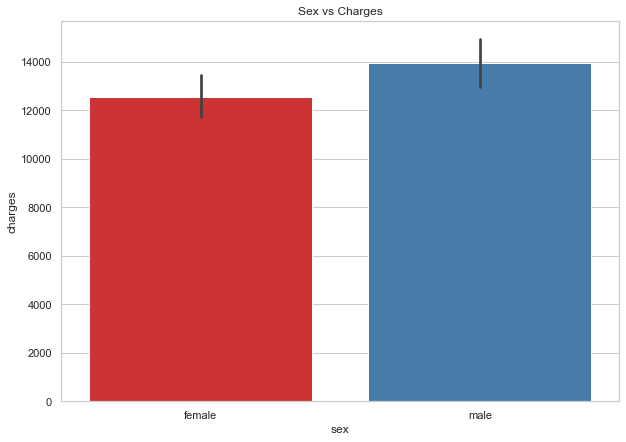

In [26]:
plt.figure(figsize=(10, 7))
plt.title('Sex vs Charges')
sns.barplot(x='sex', y='charges', data=df_Insurance, palette='Set1')
plt.show()

In [27]:
# Covariance
age = df_Insurance['age']
charges = df_Insurance['charges']
covariance = np.cov(age,charges)[0][1]
print(covariance)

50874.80229785856


In [28]:
# Pearson Correlation Coefficient
list1 = df_Insurance['age']
list2 = df_Insurance['charges']
correlation = pearsonr(list1, list2)
print(correlation)

(0.29900819333064765, 4.8866933317203816e-29)


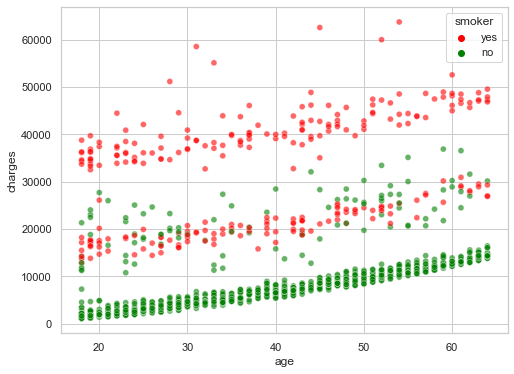

8.271435842179102e-283


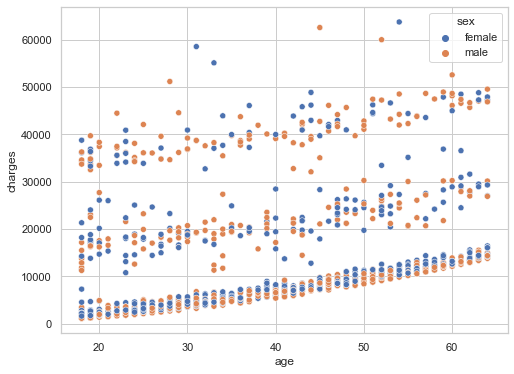

0.006548143503580696


In [29]:
# Hypothesis
# Do charges of people who smoke differ significantly from the people who don't?
df_Insurance.smoker.value_counts()

# Scatter plot to look for visual evidence of dependency between attributes smoker and charges accross different ages
plt.figure(figsize=(8, 6))
sns.scatterplot(df_Insurance.age, df_Insurance.charges, hue=df_Insurance.smoker, palette=['red', 'green'], alpha=0.6)
plt.show()

Ho = "Charges of smoker and non-smoker are same"
Ha = "Charges of smoker and non-smoker are not the same"

x = np.array(df_Insurance[df_Insurance.smoker == 'yes'].charges)
# Selecting charges corresponding to smokers as an array
y = np.array(df_Insurance[df_Insurance.smoker == 'no'].charges)
# Selecting charges corresponding to non-smokers as an array

t, p_value = stats.ttest_ind(x, y, axis=0)  # Performing an Independent t-test

print(p_value)
# Rejecting the null hypothesis as the p_value is lesser than 0.05. It tells us that the paid charges by the smokers and non-smokers is significantly different.Smokers pay higher charges in comparison to the non-smokers.

# Does bmi of males differ significantly from that of females?
df_Insurance.sex.value_counts()

plt.figure(figsize=(8, 6))
sns.scatterplot(df_Insurance.age, df_Insurance.charges, hue=df_Insurance.sex)
plt.show()


# Is the proportion of smokers significantly different in different genders?
# We will perform Chi_square test to check the proportion of smokers differs as per gender.
Ho = "Gender has no effect on smoking habits"
Ha = "Gender has an effect on smoking habits"

crosstab = pd.crosstab(df_Insurance['sex'], df_Insurance['smoker'])
chi, p_value, dof, expected = stats.chi2_contingency(crosstab)
print(p_value)
# Rejecting null hypothesis. Hence,smoking habits differs with the gender.

The Mean Square Error(MSE) or J(theta) is:  0.4746110158665121
R square obtain for normal equation method is : 0.4414244155661442
The Mean Square Error(MSE) or J(theta) is:  0.47461101586650956
R square obtain for scikit learn library is : 0.4414244155661471
R2-score on train data: 0.5166603482085597
R2-score on test data: 0.4169479145428767
R2-score on train data: 0.48094936162786484
R2-score on test data: 0.4448619381319079
R2-score on train data: 0.47561982985905205
R2-score on test data: 0.4287902883135831
                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.481
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     98.13
Date:                Thu, 03 Mar 2022   Prob (F-statistic):          2.88e-143
Time:                        21:07:28   Log-Likelihood:                -1084.2
No. Observ

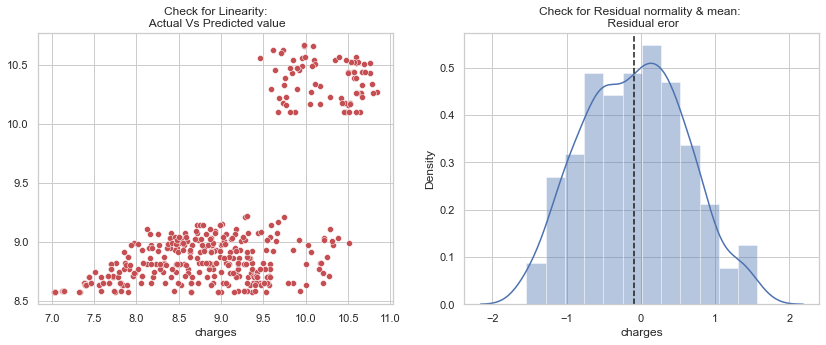

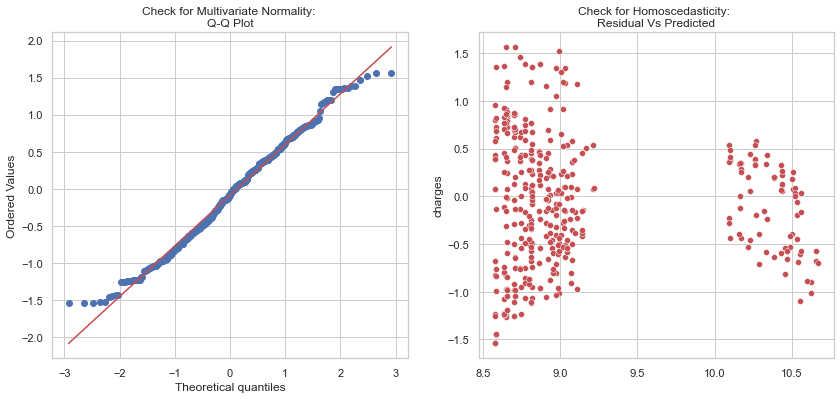

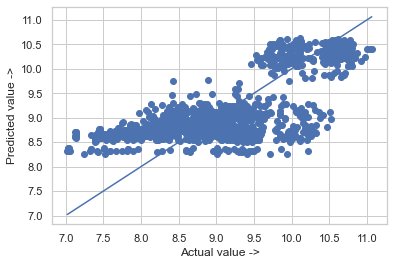

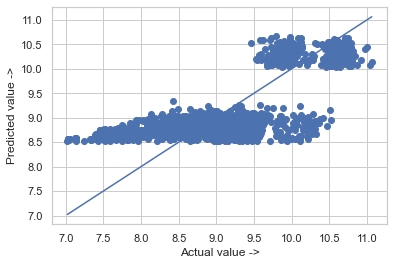

In [32]:
#Linear Regression
from sklearn.preprocessing import StandardScaler
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split

data_pre = df_Insurance.copy()

tempBmi = data_pre.bmi
tempBmi = tempBmi.values.reshape(-1,1)
data_pre['bmi'] = StandardScaler().fit_transform(tempBmi)

tempAge = data_pre.age
tempAge = tempAge.values.reshape(-1,1)
data_pre['age'] = StandardScaler().fit_transform(tempAge)

tempCharges = data_pre.charges
tempCharges = tempCharges.values.reshape(-1,1)
data_pre['charges'] = StandardScaler().fit_transform(tempCharges)

categorical_columns = ['sex', 'children', 'smoker', 'region']

dummies = pd.get_dummies(df_Insurance[[ 'sex', 'children', 'smoker', 'region']], prefix = 'OHE', prefix_sep='_',
               columns = categorical_columns,
               drop_first =True, dtype='int8' )
df = pd.concat([df_Insurance.drop(['sex', 'children','smoker', 'region'],axis=1), dummies],axis=1)

ci= boxcox(df_Insurance['charges'],alpha=0.05)
dummies['charges'] = np.log(df_Insurance['charges'])

X = dummies.drop('charges',axis=1) # Independet variable
y = dummies['charges'] # dependent variable

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=23)

# Step 1: add x0 =1 to dataset
X_train_0 = np.c_[np.ones((X_train.shape[0],1)),X_train]
X_test_0 = np.c_[np.ones((X_test.shape[0],1)),X_test]

# Step2: build model
theta = np.matmul(np.linalg.inv( np.matmul(X_train_0.T,X_train_0) ), np.matmul(X_train_0.T,y_train))

# The parameters for linear regression model
parameter = ['theta_'+str(i) for i in range(X_train_0.shape[1])]
columns = ['intersect:x_0=1'] + list(X.columns.values)
parameter_df = pd.DataFrame({'Parameter':parameter,'Columns':columns,'theta':theta})

# Scikit Learn module
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train) # Note: x_0 =1 is no need to add, sklearn will take care of it.

#Parameter
sk_theta = [lin_reg.intercept_]+list(lin_reg.coef_)
parameter_df = parameter_df.join(pd.Series(sk_theta, name='Sklearn_theta'))
parameter_df
# Normal equation
y_pred_norm =  np.matmul(X_test_0,theta)

#Evaluvation: MSE
J_mse = np.sum((y_pred_norm - y_test)**2)/ X_test_0.shape[0]

# R_square
sse = np.sum((y_pred_norm - y_test)**2)
sst = np.sum((y_test - y_test.mean())**2)
R_square = 1 - (sse/sst)
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse)
print('R square obtain for normal equation method is :',R_square)

# sklearn regression module
y_pred_sk = lin_reg.predict(X_test)

#Evaluvation: MSE
from sklearn.metrics import mean_squared_error
J_mse_sk = mean_squared_error(y_pred_sk, y_test)

# R_square
R_square_sk = lin_reg.score(X_test,y_test)
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse_sk)
print('R square obtain for scikit learn library is :',R_square_sk)

# Checking for Linearity
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(y_test,y_pred_sk,ax=ax,color='r')
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')

# Checking for Residual normality & mean
ax = f.add_subplot(122)
sns.distplot((y_test - y_pred_sk),ax=ax,color='b')
ax.axvline((y_test - y_pred_sk).mean(),color='k',linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual eror');

# Checking for Multivariate Normality
# Quantile-Quantile plot
f,ax = plt.subplots(1,2,figsize=(14,6))
import scipy as sp
_,(_,_,r)= sp.stats.probplot((y_test - y_pred_sk),fit=True,plot=ax[0])
ax[0].set_title('Check for Multivariate Normality: \nQ-Q Plot')

#Checking for Homoscedasticity
sns.scatterplot(y = (y_test - y_pred_sk), x= y_pred_sk, ax = ax[1],color='r')
ax[1].set_title('Check for Homoscedasticity: \nResidual Vs Predicted');

VIF = 1/(1- R_square_sk)

rf_reg = RandomForestRegressor(max_features = 'auto', bootstrap = True, random_state = None)
lin_reg = LinearRegression(normalize = True)
ada_reg = AdaBoostRegressor()

# Predict using Random Forest Regressor.
predRF = cross_val_predict(rf_reg, X, y, cv=10)
fig, ax = plt.subplots()
ax.scatter(y, predRF)
ax.plot([y.min(), y.max()], [y.min(), y.max()])
ax.set_xlabel('Actual value ->')
ax.set_ylabel('Predicted value ->')

# Predict using Linear Regression
predLR = cross_val_predict(lin_reg, X, y, cv=10)
fig, ax = plt.subplots()
ax.scatter(y, predLR)
ax.plot([y.min(), y.max()], [y.min(), y.max()])
ax.set_xlabel('Actual value ->')
ax.set_ylabel('Predicted value ->')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = None)

# Predict using Random Forest Regressor.
rf_reg.fit(X_train, y_train)
predtrainRF = rf_reg.predict(X_train)     # Prediction for train data
predtestRF = rf_reg.predict(X_test)       # Prediction for test data

# Compute R-squared score for both train and test data.
print("R2-score on train data:", r2_score(y_train,predtrainRF))
print("R2-score on test data:", r2_score(y_test, predtestRF))

# Predict using Linear Regression
lin_reg.fit(X_train, y_train)
predtrainL = lin_reg.predict(X_train)
predtestL = lin_reg.predict(X_test)
print("R2-score on train data:",r2_score(y_train, predtrainL))
print("R2-score on test data:",r2_score(y_test, predtestL))

# Predict using XGBoost Regressor
ada_reg.fit(X_train, y_train)
predtrainAda = ada_reg.predict(X_train)
predtestAda = ada_reg.predict(X_test)
print("R2-score on train data:",r2_score(y_train, predtrainAda))
print("R2-score on test data:",r2_score(y_test, predtestAda))

X_newtrain = sm.add_constant(X_train)
ols_train = sm.OLS(y_train, X_newtrain)
ols_train_new = ols_train.fit()
print(ols_train_new.summary())

# On Test data.
X_newtest = sm.add_constant(X_test)
ols_test = sm.OLS(y_test, X_newtest)
ols_test_new = ols_test.fit()
print(ols_test_new.summary())   # Produce full statistical summary

